#IPL Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

####-- Winning Team Data Analysis --

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Files/matches.csv')

In [3]:
df.head(3)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar


In [4]:
# Fixing repeated team names with different spellings
df[['team1','team2','toss_winner','winner']] = df[['team1','team2','toss_winner','winner']].apply(lambda val : val.str.replace('Rising Pune Supergiants','Rising Pune Supergiant') )

In [5]:
winners_df = df['winner'].sort_values().value_counts().to_frame(name='Number of Wins')

<Axes: title={'center': 'Number of matches won in IPL'}, xlabel='winner'>

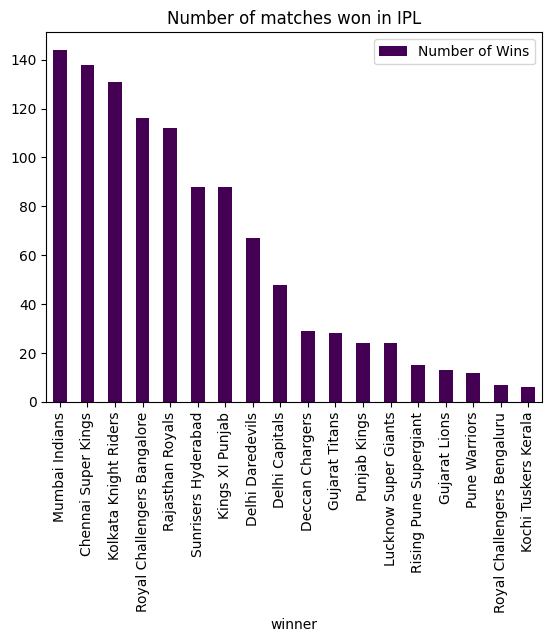

In [6]:
winners_df.plot(kind = 'bar', title = 'Number of matches won in IPL', colormap='viridis', label = 'Number of wins' )

#### -- Winning toss means winning the match ? --

In [7]:
winning_toss_winning_match = df[(df['toss_winner'] == df['winner'])]
winning_toss_losing_match = df[(df['toss_winner'] != df['winner'])]

In [8]:
new_df = pd.DataFrame({"Team won the toss":[ winning_toss_winning_match.shape[0],winning_toss_losing_match.shape[0]  ]}, index = ['Won match', 'Lost match']  )
display(new_df)

,Team won the toss
Won match,554
Lost match,541


<Axes: title={'center': 'Number of time a team won the toss and the match result of that match'}, ylabel='Team won the toss'>

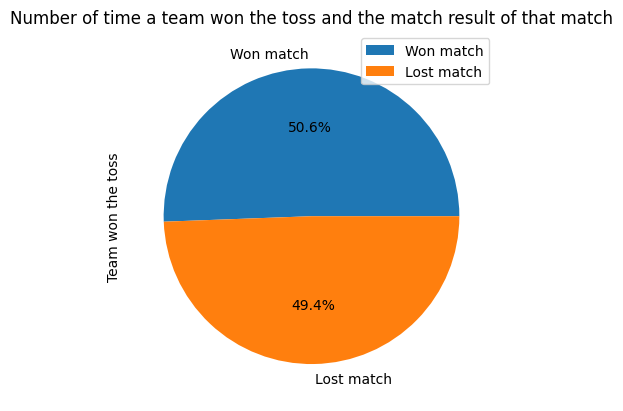

In [9]:
new_df.plot( kind = 'pie', y='Team won the toss', autopct='%1.1f%%', title = "Number of time a team won the toss and the match result of that match")

#### -- Batting / Fielding, What to choose to win ? --

In [10]:
team_batting_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['id', 'winner']]

team_fielding_first_won = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'),  ['id', 'winner']]

In [11]:
team_batting_first_won_df = team_batting_first_won['winner'].value_counts()
team_fielding_first_won_df = team_fielding_first_won['winner'].value_counts()

In [12]:
batting_or_fielding_df = pd.DataFrame({"Team won":[ team_batting_first_won_df.shape[0],team_fielding_first_won_df.shape[0]  ]}, index = ['Bating first', 'Fielding first']  )
display(batting_or_fielding_df)

,Team won
Bating first,14
Fielding first,17


<Axes: title={'center': 'Decision of bat/field vs result of match'}>

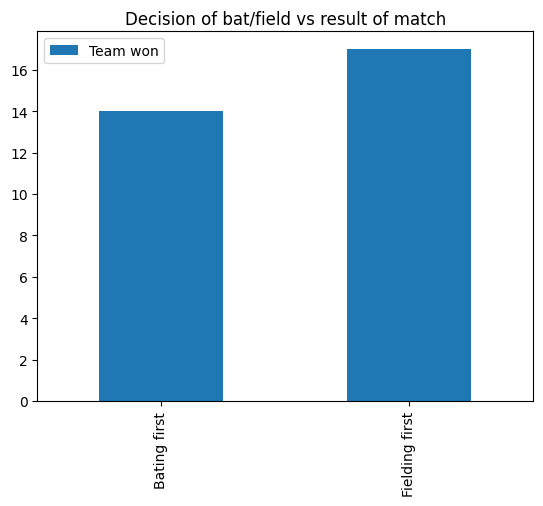

In [13]:
batting_or_fielding_df.plot( kind = 'bar' , title = "Decision of bat/field vs result of match")

#### -- Top 20 most used venue --

In [14]:
venue_df = df['venue'].value_counts().to_frame(name='Most used venue').head(20)

<Axes: title={'center': 'Top 20 most used venue in IPL'}, xlabel='venue'>

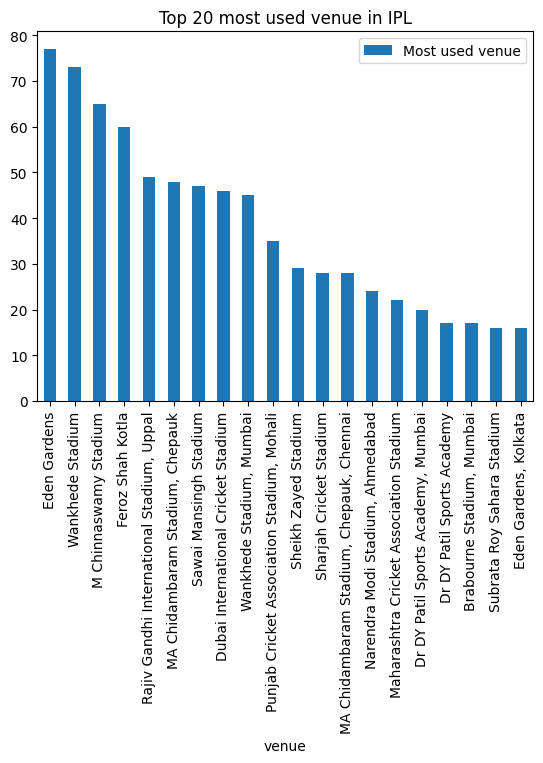

In [15]:
venue_df.plot(kind = 'bar', title = 'Top 20 most used venue in IPL')